## **Proyek Analisis Sentimen**
### **Rasyid Alfiansyah**

**SKEMA PELATIHAN MODEL**

*   SKEMA 1: Pelatihan: Random Forest, Ekstraksi Fitur: TF-IDF, Pembagian Data: 80/20
*   SKEMA 2: Pelatihan: SVM, Ekstraksi Fitur: TF-IDF, Pembagian Data: 80/20
*   SKEMA 3: Pelatihan: Random Forest, Ekstraksi Fitur: CountVectorizer + LSA, Pembagian Data: 85/15



# 1. INSTALL & IMPORT LIBRARY

In [1]:
# Pasang dependensi
%pip install tqdm nltk Sastrawi wordcloud imbalanced-learn

# Dasar Data & Visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Pra-pemrosesan Teks
import re
import string
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk import SnowballStemmer
from nltk.tokenize import RegexpTokenizer, word_tokenize, sent_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Machine Learning & Evaluasi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

# Utilitas
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
tqdm.pandas()
%matplotlib inline
import cv2

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. MUAT DATA & PRELIMINARY CLEANING

In [2]:
url = 'gojek_reviews_all_ratings.csv'
df = pd.read_csv(url)
df

,reviewId,userName,content,score,thumbsUpCount
0,99a9f884-c904-404c-83e8-6c81f08e7bde,Adri Tamanna,gila memang nih aplikator!! naik versi sehari ...,1,0
1,13874255-62ab-4f19-9368-3f2aba7bab3c,Racka Opay,w ksh bintang 5 mudah3n orderan d lancarin,5,8
2,046e9c9c-00f7-4d5d-9e0e-25c680c0af72,Thomas Gorga,sekarang gojek udh di akuisisi oleh grab..apli...,1,33
3,9a3ecd20-378a-4fa6-a037-61becb0159e0,Muhamad Ridwan14,buruk,1,1
4,6accf317-c375-42b3-adae-07bcda2eb531,ardi wiro,"Perbaiki APKnya.. eror mulu, jgn hanya mau pot...",1,1
...,...,...,...,...,...
9995,7f3af234-11b3-42e8-a507-0173211bbec0,Putra 24,update trus hmpir tiap minggu malah jdi suka e...,2,45
9996,7c554f67-5542-44ae-bfad-8aed16bf3032,Guntur Hadi,Semoga Aplikasi Daring di Indonesia semakin me...,1,33
9997,c1261f08-1546-4b97-ae50-733dc541524a,Cacha Joe,1.80.1 Test....,5,2
9998,56893d0c-6c77-43c0-8205-60cdd0975e67,Bambang Eko S,gak bisa konsisten kalo gak ada bonusnya,2,1


In [3]:
# Menghitung dan menampilkan nilai NaN
missing_data = df.isna().sum()
print(missing_data)

reviewId         0
userName         0
content          0
score            0
thumbsUpCount    0
dtype: int64


In [4]:
# Hapus kolom tidak perlu
df = df.drop(columns=['reviewId', 'thumbsUpCount'])
print(df.columns)

Index(['userName', 'content', 'score'], dtype='object')


In [5]:
# Tampilkan ringkasan informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  10000 non-null  object
 1   content   10000 non-null  object
 2   score     10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [6]:
# Hitung jumlah score pada rating 1 - 5
df['score'].value_counts()

,count
score,
1,5715
5,3178
2,469
3,417
4,221


<Axes: title={'center': 'Persebaran Data Score'}, xlabel='score'>

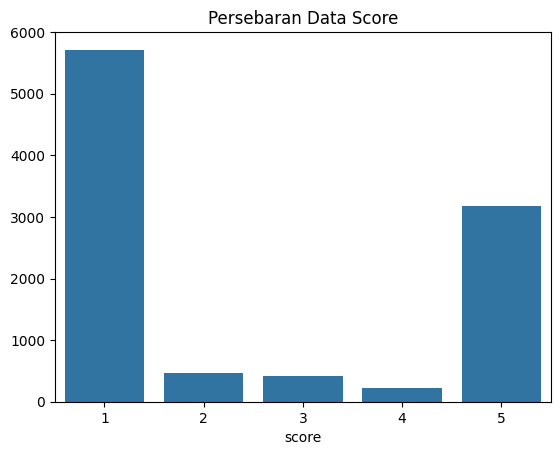

In [7]:
# Kelompokkan data berdasarkan kolom score
result = df.groupby(['score']).size()
plt.title('Persebaran Data Score')
sns.color_palette("viridis")
# plot the result
sns.barplot(x = result.index, y = result.values)

# 3. PEMBUATAN LABEL

In [8]:
def assign_label(score):
    if score > 3:
        return 1, 'positive'
    elif score == 3:
        return 0, 'neutral'
    else:
        return -1, 'negative'

labels = df['score'].apply(assign_label)
df[['label_num','label']] = pd.DataFrame(labels.tolist(), index=df.index)

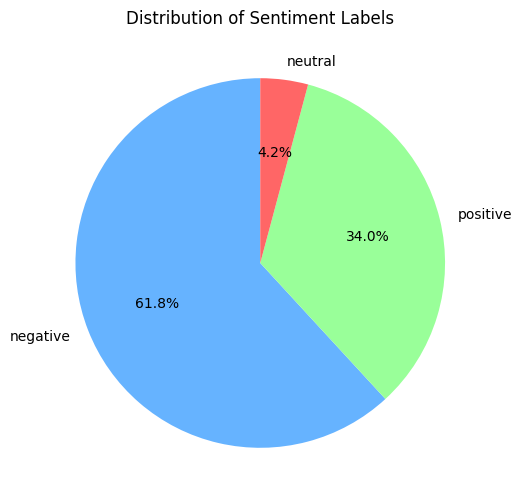

In [9]:
# Hitung jumlah label pada setiap kategori
label_counts = df['label'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ff6666'])
plt.title('Distribution of Sentiment Labels')
plt.show()

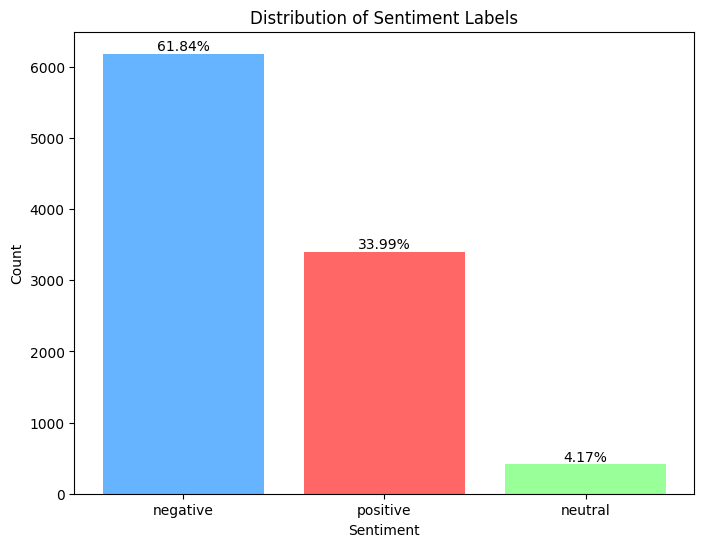

In [10]:
# Hitung jumlah label pada setiap kategori
label_counts = df['label'].value_counts()

# Hitung persentase untuk setiap kategori
label_percentages = label_counts / label_counts.sum() * 100

# Buat bar chart dan simpan dalam variabel `bars`
plt.figure(figsize=(8, 6))
bars = plt.bar(label_counts.index, label_counts.values, color=['#66b3ff', '#ff6666', '#99ff99'])

# Tambahkan persentase di atas setiap bar
for bar, percentage in zip(bars, label_percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{percentage:.2f}%',
        ha='center',
        va='bottom'
    )

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

# 4. PREPROCESSING TEKS

In [11]:
def preprocess_text(text):
    text = re.sub(r'https\S+', ' ', text, flags=re.IGNORECASE) # Menghapus URL
    text = text.lower() # Mengubah teks jadi lower case
    text = re.sub(r'@\S+', ' ', text, flags=re.IGNORECASE) # Menghapus mention
    text = re.sub(r'#\S+', ' ', text, flags=re.IGNORECASE) # Menghapus hashtag
    text = re.sub(r"'\w+", ' ', text) # Menghapus next karakter
    text = re.sub(r'[^\w\s]', ' ', text) # Menghapus tanda baca
    text = re.sub(r'\s+', ' ', text).strip() # Menghapus extra whitespace
    return text

# Terapkan
df['text_Clean'] = df['content'].progress_apply(preprocess_text)

100%|██████████| 10000/10000 [00:00<00:00, 38642.90it/s]


In [12]:
# Normalisasi slang
kamus_slang = pd.read_excel('kamuskatabaku.xlsx')
slang_dict = dict(zip(kamus_slang['tidak_baku'], kamus_slang['kata_baku']))
def ganti_slang(teks):
    return ' '.join([slang_dict.get(kata, kata) for kata in teks.split()])

# Terapkan
df['text_Normalization'] = df['text_Clean'].progress_apply(ganti_slang)

100%|██████████| 10000/10000 [00:00<00:00, 62001.80it/s]


In [13]:
# Hapus stopwords
stop = stopwords.words('indonesian')
df['text_StopWord'] = df['text_Normalization'].progress_apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
regexp = RegexpTokenizer('\w+')
df['text_Tokenization']=df['text_StopWord'].progress_apply(regexp.tokenize)

100%|██████████| 10000/10000 [00:00<00:00, 89626.29it/s]


In [14]:
# Tokenisasi & Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['text_Stemmindo'] = df['text_Tokenization'].progress_apply(lambda x: [stemmer.stem(y) for y in x])
df['text_String'] = df['text_Stemmindo'].progress_apply(lambda x: ' '.join([item for item in x if len(item)>3]))

100%|██████████| 10000/10000 [00:00<00:00, 258468.90it/s]


In [15]:
# Informasi Dataframe Terbaru
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userName            10000 non-null  object
 1   content             10000 non-null  object
 2   score               10000 non-null  int64 
 3   label_num           10000 non-null  int64 
 4   label               10000 non-null  object
 5   text_Clean          10000 non-null  object
 6   text_Normalization  10000 non-null  object
 7   text_StopWord       10000 non-null  object
 8   text_Tokenization   10000 non-null  object
 9   text_Stemmindo      10000 non-null  object
 10  text_String         10000 non-null  object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB


,userName,content,score,label_num,label,text_Clean,text_Normalization,text_StopWord,text_Tokenization,text_Stemmindo,text_String
0,Adri Tamanna,gila memang nih aplikator!! naik versi sehari ...,1,-1,negative,gila memang nih aplikator naik versi sehari cu...,gila memang nih aplikator naik versi sehari cu...,gila nih aplikator versi sehari cuman kasih 1 ...,"[gila, nih, aplikator, versi, sehari, cuman, k...","[gila, nih, aplikator, versi, hari, cuman, kas...",gila aplikator versi hari cuman kasih order pa...
1,Racka Opay,w ksh bintang 5 mudah3n orderan d lancarin,5,1,positive,w ksh bintang 5 mudah3n orderan d lancarin,gue kasih bintang 5 mudah3n orderan di lancarin,gue kasih bintang 5 mudah3n orderan lancarin,"[gue, kasih, bintang, 5, mudah3n, orderan, lan...","[gue, kasih, bintang, 5, mudah3n, order, lanca...",kasih bintang mudah3n order lancarin
2,Thomas Gorga,sekarang gojek udh di akuisisi oleh grab..apli...,1,-1,negative,sekarang gojek udh di akuisisi oleh grab aplik...,sekarang gojek sudah di akuisisi oleh grab apl...,gojek akuisisi grab aplikasi negeri singkirkan...,"[gojek, akuisisi, grab, aplikasi, negeri, sing...","[gojek, akuisisi, grab, aplikasi, negeri, sing...",gojek akuisisi grab aplikasi negeri singkir ap...
3,Muhamad Ridwan14,buruk,1,-1,negative,buruk,buruk,buruk,[buruk],[buruk],buruk
4,ardi wiro,"Perbaiki APKnya.. eror mulu, jgn hanya mau pot...",1,-1,negative,perbaiki apknya eror mulu jgn hanya mau potong...,perbaiki apknya eror mulu jangan hanya mau pot...,perbaiki apknya eror mulu potongannya lihat ap...,"[perbaiki, apknya, eror, mulu, potongannya, li...","[baik, apknya, eror, mulu, potong, lihat, apkn...",baik apknya eror mulu potong lihat apknya seri...
...,...,...,...,...,...,...,...,...,...,...,...
9995,Putra 24,update trus hmpir tiap minggu malah jdi suka e...,2,-1,negative,update trus hmpir tiap minggu malah jdi suka e...,update terus hampir tiap minggu malah jadi suk...,update minggu suka eror lemot maps suka mengaco,"[update, minggu, suka, eror, lemot, maps, suka...","[update, minggu, suka, eror, lot, maps, suka, ...",update minggu suka eror maps suka
9996,Guntur Hadi,Semoga Aplikasi Daring di Indonesia semakin me...,1,-1,negative,semoga aplikasi daring di indonesia semakin me...,semoga aplikasi daring di indonesia semakin me...,semoga aplikasi daring indonesia membaik meman...,"[semoga, aplikasi, daring, indonesia, membaik,...","[moga, aplikasi, daring, indonesia, baik, manu...",moga aplikasi daring indonesia baik manusiawi ...
9997,Cacha Joe,1.80.1 Test....,5,1,positive,1 80 1 test,1 80 1 test,1 80 1 test,"[1, 80, 1, test]","[1, 80, 1, test]",test
9998,Bambang Eko S,gak bisa konsisten kalo gak ada bonusnya,2,-1,negative,gak bisa konsisten kalo gak ada bonusnya,tidak bisa konsisten kalau tidak ada bonusnya,konsisten bonusnya,"[konsisten, bonusnya]","[konsisten, bonus]",konsisten bonus


In [16]:
# Simpan hasil
df.to_csv('hasil_Preprocessing_gojek_reviews_all_ratings.csv',index= False) #simpan hasil text preprocessing ke file csv

# 5. EKSTRAKSI FITUR: TF-IDF

In [17]:
df = pd.read_csv('hasil_Preprocessing_gojek_reviews_all_ratings.csv')

In [18]:
X = df['text_String']
y = df['label_num']

In [19]:
X

,text_String
0,gila aplikator versi hari cuman kasih order pa...
1,kasih bintang mudah3n order lancarin
2,gojek akuisisi grab aplikasi negeri singkir ap...
3,buruk
4,baik apknya eror mulu potong lihat apknya seri...
...,...
9995,update minggu suka eror maps suka
9996,moga aplikasi daring indonesia baik manusiawi ...
9997,test
9998,konsisten bonus


In [20]:
y

,label_num
0,-1
1,1
2,-1
3,-1
4,-1
...,...
9995,-1
9996,-1
9997,1
9998,-1


In [21]:
# Misal kolom-nya bernama 'text_String'
corpus = df['text_String'].fillna('')  # Ganti NaN dengan ''

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(
    tqdm(corpus, desc="Menghitung TF-IDF")
)

terms = tfidf_vectorizer.get_feature_names_out()

# Hitung IDF
idf = np.log(
    tfidf_matrix.shape[0] /
    (np.count_nonzero(tfidf_matrix.toarray(), axis=0) + 1)
)

tfidf_df = pd.DataFrame({'term': terms, 'idf': idf})

# Tambah kolom TF
for i in tqdm(range(tfidf_matrix.shape[0]), desc="Menambahkan kolom TF"):
    tf = tfidf_matrix[i].toarray().flatten()
    tfidf_df[f'tf_{i}'] = tf

Menambahkan kolom TF: 100%|██████████| 10000/10000 [00:27<00:00, 360.17it/s]


In [22]:
tfidf_df

,term,idf,tf_0,tf_1,tf_2,tf_3,tf_4,tf_5,tf_6,tf_7,...,tf_9990,tf_9991,tf_9992,tf_9993,tf_9994,tf_9995,tf_9996,tf_9997,tf_9998,tf_9999
0,000rb,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000sehari,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000x3,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0051,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,08810,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,zonkkkk,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7978,zonkkkkk,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7979,zoom,7.600902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7980,zooonk,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Simpan objek TfidfVectorizer yang telah di-fit
dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [24]:
# Mengakses vocabulary
vocab = tfidf_vectorizer.vocabulary_

# Menampilkan vocabulary
print(vocab)

{'gila': 2546, 'aplikator': 657, 'versi': 7825, 'hari': 2804, 'cuman': 1632, 'kasih': 3402, 'order': 5442, 'pagi': 5526, 'pulang': 6080, 'malam': 4239, 'edan': 2166, 'bintang': 1151, 'mudah3n': 4777, 'lancarin': 3974, 'gojek': 2613, 'akuisisi': 411, 'grab': 2685, 'aplikasi': 647, 'negeri': 4893, 'singkir': 6881, 'payah': 5652, 'tinggal': 7495, 'nama': 4857, 'doang': 2038, 'buruk': 1377, 'baik': 814, 'apknya': 634, 'eror': 2248, 'mulu': 4792, 'potong': 5988, 'lihat': 4081, 'sering': 6761, 'nyala': 5243, 'aktip': 401, 'kendala': 3558, 'deteksi': 1789, 'jarak': 3115, 'jemput': 3194, 'tarif': 7265, 'hitung': 2869, 'bagus': 802, 'sistem': 6901, 'siksa': 6857, 'driver': 2109, 'lancarjaya': 3975, 'moga': 4723, 'andal': 524, 'onbidnya': 5381, 'delay': 1748, 'lapor': 4001, 'ride': 6318, 'fiktif': 2319, 'drivers': 2117, 'benernya': 1013, 'pilih': 5887, 'keluh': 3518, 'ahiri': 349, 'salah': 6441, 'doble': 2040, 'tolong': 7552, 'hapus': 2791, 'langgan': 3977, 'mengcancel': 4515, 'konfirmasi': 3772

In [25]:
vocab

{'gila': 2546,
 'aplikator': 657,
 'versi': 7825,
 'hari': 2804,
 'cuman': 1632,
 'kasih': 3402,
 'order': 5442,
 'pagi': 5526,
 'pulang': 6080,
 'malam': 4239,
 'edan': 2166,
 'bintang': 1151,
 'mudah3n': 4777,
 'lancarin': 3974,
 'gojek': 2613,
 'akuisisi': 411,
 'grab': 2685,
 'aplikasi': 647,
 'negeri': 4893,
 'singkir': 6881,
 'payah': 5652,
 'tinggal': 7495,
 'nama': 4857,
 'doang': 2038,
 'buruk': 1377,
 'baik': 814,
 'apknya': 634,
 'eror': 2248,
 'mulu': 4792,
 'potong': 5988,
 'lihat': 4081,
 'sering': 6761,
 'nyala': 5243,
 'aktip': 401,
 'kendala': 3558,
 'deteksi': 1789,
 'jarak': 3115,
 'jemput': 3194,
 'tarif': 7265,
 'hitung': 2869,
 'bagus': 802,
 'sistem': 6901,
 'siksa': 6857,
 'driver': 2109,
 'lancarjaya': 3975,
 'moga': 4723,
 'andal': 524,
 'onbidnya': 5381,
 'delay': 1748,
 'lapor': 4001,
 'ride': 6318,
 'fiktif': 2319,
 'drivers': 2117,
 'benernya': 1013,
 'pilih': 5887,
 'keluh': 3518,
 'ahiri': 349,
 'salah': 6441,
 'doble': 2040,
 'tolong': 7552,
 'hapus': 2

In [26]:
# Menampilkan beberapa entri pertama dari kosakata
for word, index in list(vocab.items())[:10]:
    print(f'Kata: {word}, Indeks: {index}')

Kata: gila, Indeks: 2546
Kata: aplikator, Indeks: 657
Kata: versi, Indeks: 7825
Kata: hari, Indeks: 2804
Kata: cuman, Indeks: 1632
Kata: kasih, Indeks: 3402
Kata: order, Indeks: 5442
Kata: pagi, Indeks: 5526
Kata: pulang, Indeks: 6080
Kata: malam, Indeks: 4239


In [27]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi representasi numerik
tfidf_vectorizer = TfidfVectorizer()

# Fill NaN values with an empty string
X = X.fillna('')

X_tfidf = tfidf_vectorizer.fit_transform(X)

# Inisialisasi SMOTE
smote = SMOTE()

# Resampling dataset untuk menangani imbalanced data
X_sm, y_sm = smote.fit_resample(X_tfidf, y)

In [28]:
# print isi semua data
print(X_sm)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 156841 stored elements and shape (18552, 7982)>
  Coords	Values
  (0, 2546)	0.31856788645433093
  (0, 657)	0.2603413820798682
  (0, 7825)	0.2835197303594433
  (0, 2804)	0.282291699368551
  (0, 1632)	0.326143097382132
  (0, 3402)	0.20579354535995553
  (0, 5442)	0.14277357780673752
  (0, 5526)	0.2758435124731968
  (0, 6080)	0.37248804233506067
  (0, 4239)	0.30579440145520276
  (0, 2166)	0.43956003758556017
  (1, 3402)	0.2319039398178346
  (1, 5442)	0.16088821025634203
  (1, 1151)	0.35415126926413953
  (1, 4777)	0.6440103933441921
  (1, 3974)	0.6165736275910081
  (2, 657)	0.2092806350324092
  (2, 2613)	0.27003663668100464
  (2, 411)	0.41518146808018375
  (2, 2685)	0.3030768211791401
  (2, 647)	0.13676736199127673
  (2, 4893)	0.37712161562405744
  (2, 6881)	0.41518146808018375
  (2, 5652)	0.27898987480245224
  (2, 7495)	0.2844603964294411
  :	:
  (18543, 4450)	0.011772358033594998
  (18543, 1333)	0.010491052483532826
  (18543, 4

# 6. PELATIHAN MODEL RANDOM FOREST, SVM, DECISION TREE DARI TF-IDF

SKEMA 1: TF-IDF RF 80% 20%

Jumlah X_train: 14841
Jumlah X_test: 3711
Jumlah y_train: 14841
Jumlah y_test: 3711
Jumlah prediksi benar	: 3287
Jumlah prediksi salah	: 424
Akurasi pengujian	: 88.57450821880894 %
Confusion matrix:
 [[1017   54  154]
 [  11 1231   26]
 [ 134   45 1039]]


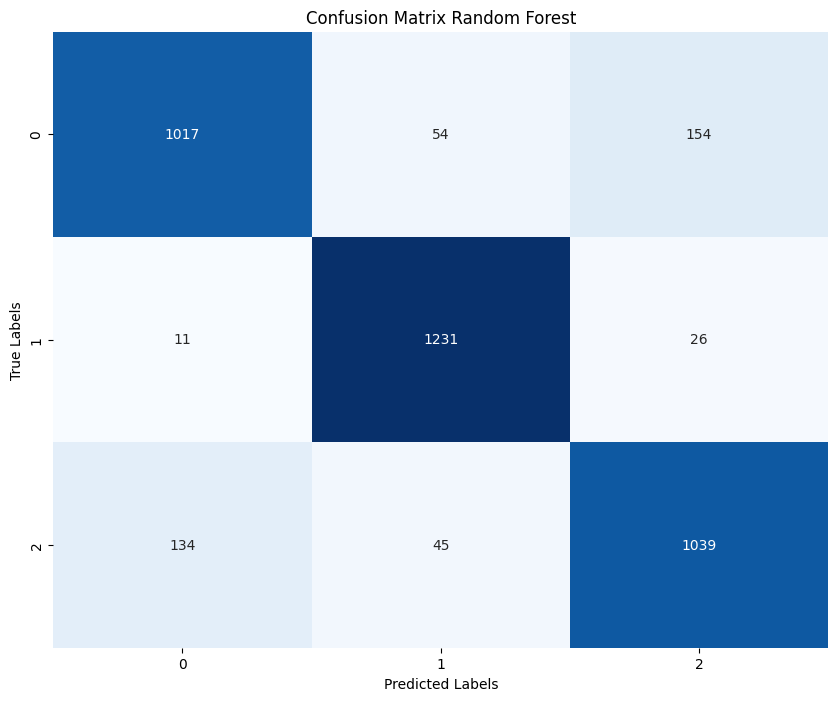

Classification report:
               precision    recall  f1-score   support

          -1       0.88      0.83      0.85      1225
           0       0.93      0.97      0.95      1268
           1       0.85      0.85      0.85      1218

    accuracy                           0.89      3711
   macro avg       0.88      0.88      0.88      3711
weighted avg       0.88      0.89      0.88      3711



In [29]:
X_train , X_test , y_train , y_test = train_test_split(X_sm , y_sm , test_size=0.2,random_state=40)
print(f"Jumlah X_train: {X_train.shape[0]}")
print(f"Jumlah X_test: {X_test.shape[0]}")
print(f"Jumlah y_train: {y_train.shape[0]}")
print(f"Jumlah y_test: {y_test.shape[0]}")

algorithm = RandomForestClassifier()
model = algorithm.fit(X_train, y_train)
RandomForestClassifier()

# Simpan model hasil traning
dump(model, filename='model_rf_tfidf.joblib')

# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

# Tampilkan label sebenarnya pada data uji (actual label)
y_test

# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy_rf = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy_rf, '%')

matrik = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', matrik)

# Misalkan y_test adalah label sebenarnya dan model_pred adalah prediksi model
matrik = confusion_matrix(y_test, model_pred)

# Plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrik, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print('Classification report:\n', classification_report(y_test, model_pred))

SKEMA 2: TF-IDF SVM 80% 20%

Jumlah prediksi benar	: 3248
Jumlah prediksi salah	: 463
Akurasi pengujian	: 87.523578550256 %
Confusion matrix:
 [[1138   25   62]
 [   9 1132  127]
 [ 206   34  978]]


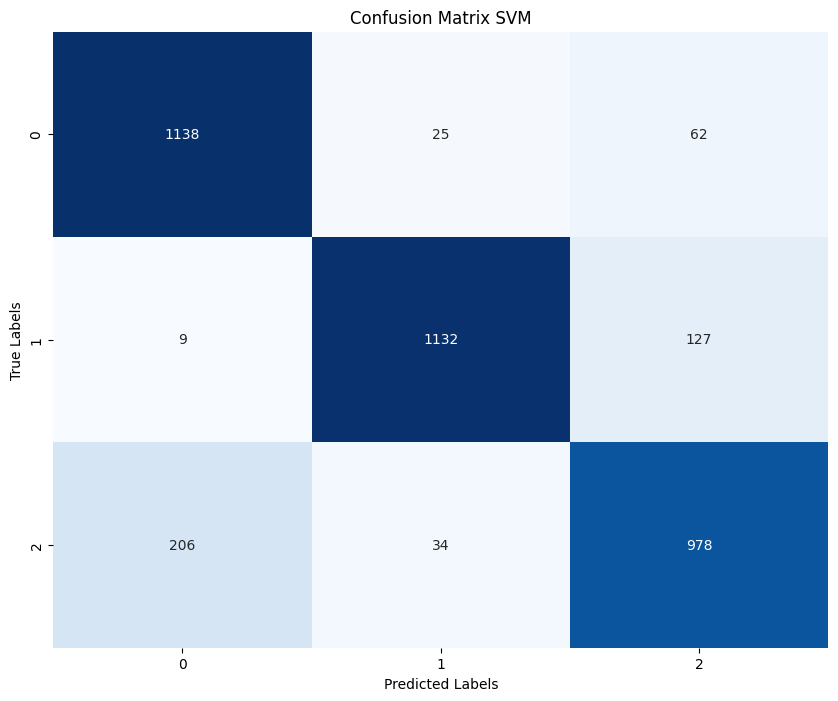

Classification report:
               precision    recall  f1-score   support

          -1       0.84      0.93      0.88      1225
           0       0.95      0.89      0.92      1268
           1       0.84      0.80      0.82      1218

    accuracy                           0.88      3711
   macro avg       0.88      0.87      0.87      3711
weighted avg       0.88      0.88      0.88      3711



In [30]:
# Inisialisasi model
model_svm = SVC(probability=True)

# Latih model
model_svm.fit(X_train, y_train)

# Simpan model
dump(model_svm, filename='model_svm_tfidf.joblib')

# Gunakan model yang telah di latih untuk memprediksi label pada data uji

model_pred_svm = model_svm.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred_svm

# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar_svm = (model_pred_svm == y_test).sum()
prediksi_salah_svm = (model_pred_svm != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar_svm)
print('Jumlah prediksi salah\t:', prediksi_salah_svm)

accuracy_svm = prediksi_benar_svm / (prediksi_benar_svm + prediksi_salah_svm)*100
print('Akurasi pengujian\t:', accuracy_svm, '%')

# confusion matrix SVM
matrik_svm = confusion_matrix(y_test, model_pred_svm)
print('Confusion matrix:\n', matrik_svm)

# Plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrik_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print('Classification report:\n', classification_report(y_test, model_pred_svm))

DECISION TREE

Jumlah prediksi benar	: 2985
Jumlah prediksi salah	: 726
Akurasi pengujian	: 80.43654001616815 %
Confusion matrix:
 [[ 867  124  234]
 [  59 1167   42]
 [ 178   89  951]]


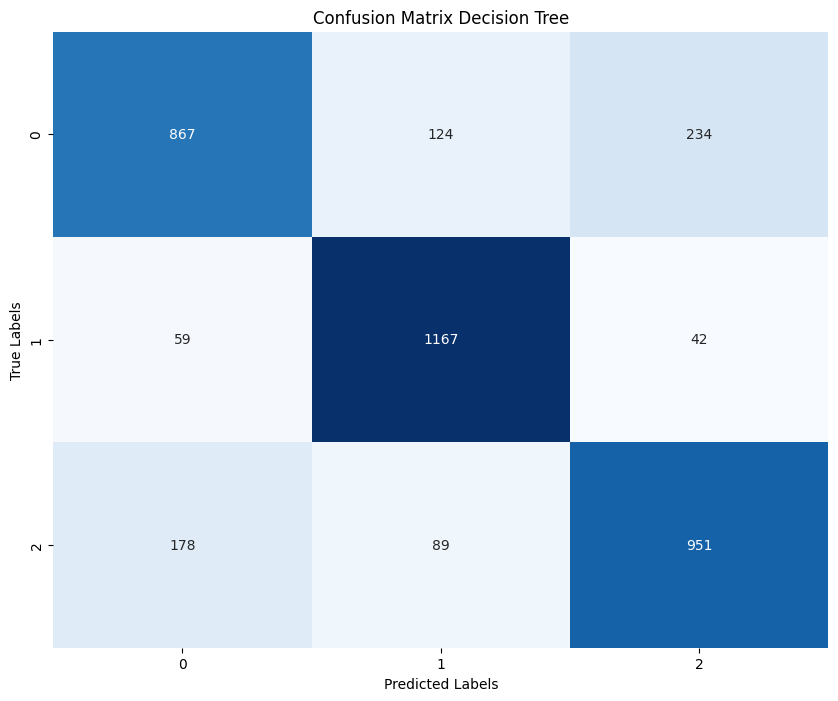

Classification report:
               precision    recall  f1-score   support

          -1       0.79      0.71      0.74      1225
           0       0.85      0.92      0.88      1268
           1       0.78      0.78      0.78      1218

    accuracy                           0.80      3711
   macro avg       0.80      0.80      0.80      3711
weighted avg       0.80      0.80      0.80      3711



In [31]:
# Inisialisasi model
model_dt = DecisionTreeClassifier()

# Latih model
model_dt.fit(X_train, y_train)

# Simpan model
dump(model_dt, filename='model_dt_tfidf.joblib')

# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred_dt = model_dt.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred_dt

# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar_dt = (model_pred_dt == y_test).sum()
prediksi_salah_dt = (model_pred_dt != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar_dt)
print('Jumlah prediksi salah\t:', prediksi_salah_dt)

accuracy_dt = prediksi_benar_dt / (prediksi_benar_dt + prediksi_salah_dt)*100
print('Akurasi pengujian\t:', accuracy_dt, '%')

# confusion matrix Decision Tree
matrik_dt = confusion_matrix(y_test, model_pred_dt)
print('Confusion matrix:\n', matrik_dt)

# Plot confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrik_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print('Classification report:\n', classification_report(y_test, model_pred_dt))

# 7. EKSTRAKSI FITUR CountVectorizer + LSA

In [32]:
# Siapkan fitur dan label langsung
X = df['text_String'].fillna('')  # kolom hasil preprocessing
y = df['label_num']               # label numerik

# Ekstraksi fitur dengan CountVectorizer (unigram & bigram)
cv = CountVectorizer(ngram_range=(1,2), min_df=2)
X_counts = cv.fit_transform(X)

# Reduksi dimensi menggunakan LSA (TruncatedSVD)
svd = TruncatedSVD(n_components=100, random_state=2)
X_lsa = svd.fit_transform(X_counts)

# Simpan CountVectorizer
dump(cv, 'lsa_count_vectorizer.joblib')

# Simpan TruncatedSVD (LSA)
dump(svd, 'lsa_svd_transformer.joblib')

['lsa_svd_transformer.joblib']

# 8. PELATIHAN MODEL RANDOM FOREST, SVM DARI CountVectorizer + LSA

SKEMA 3: CountVectorizer + LSA RF 85% 15%

Jumlah prediksi benar : 1184
Jumlah prediksi salah : 316
Akurasi pengujian     : 78.93%

Confusion matrix:
 [[878   1  50]
 [ 66   1   9]
 [189   1 305]]

Classification report:
               precision    recall  f1-score   support

          -1       0.77      0.95      0.85       929
           0       0.33      0.01      0.03        76
           1       0.84      0.62      0.71       495

    accuracy                           0.79      1500
   macro avg       0.65      0.52      0.53      1500
weighted avg       0.77      0.79      0.76      1500



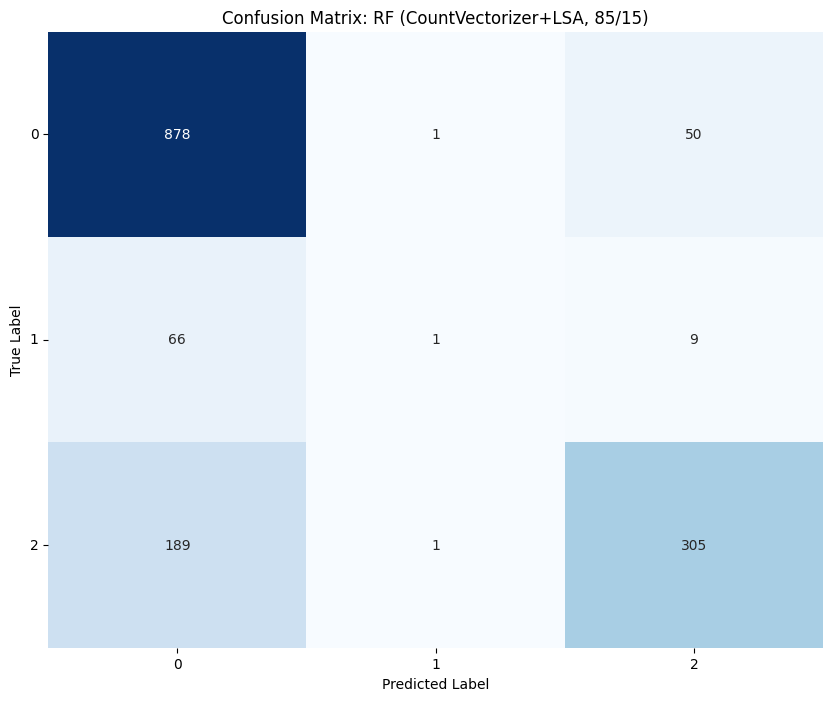

In [33]:
# Split data 85% train / 15% test
X_train, X_test, y_train, y_test = train_test_split(
    X_lsa, y, test_size=0.15, random_state=2
)

# Pelatihan model Random Forest
rf_lsa = RandomForestClassifier(random_state=42)
rf_lsa.fit(X_train, y_train)

# Simpan model hasil traning
dump(rf_lsa, filename='model_rf_lsa.joblib')

# Prediksi dan evaluasi
y_pred = rf_lsa.predict(X_test)

# Hitung jumlah prediksi benar & salah
prediksi_benar = (y_pred == y_test).sum()
prediksi_salah = (y_pred != y_test).sum()

# Hitung akurasi sebagai persentase
accuracy_rf_lsa = prediksi_benar / (prediksi_benar + prediksi_salah) * 100

print(f"Jumlah prediksi benar : {prediksi_benar}")
print(f"Jumlah prediksi salah : {prediksi_salah}")
print(f"Akurasi pengujian     : {accuracy_rf_lsa:.2f}%\n")

# Tampilkan confusion matrix dan classification report
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: RF (CountVectorizer+LSA, 85/15)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation=0)
plt.show()

SVM

Jumlah prediksi benar	: 1141
Jumlah prediksi salah	: 359
Akurasi pengujian	: 76.06666666666668 %
Confusion matrix:
 [[798   0 131]
 [ 55   0  21]
 [152   0 343]]

Classification report:
               precision    recall  f1-score   support

          -1       0.79      0.86      0.83       929
           0       0.00      0.00      0.00        76
           1       0.69      0.69      0.69       495

    accuracy                           0.76      1500
   macro avg       0.50      0.52      0.51      1500
weighted avg       0.72      0.76      0.74      1500



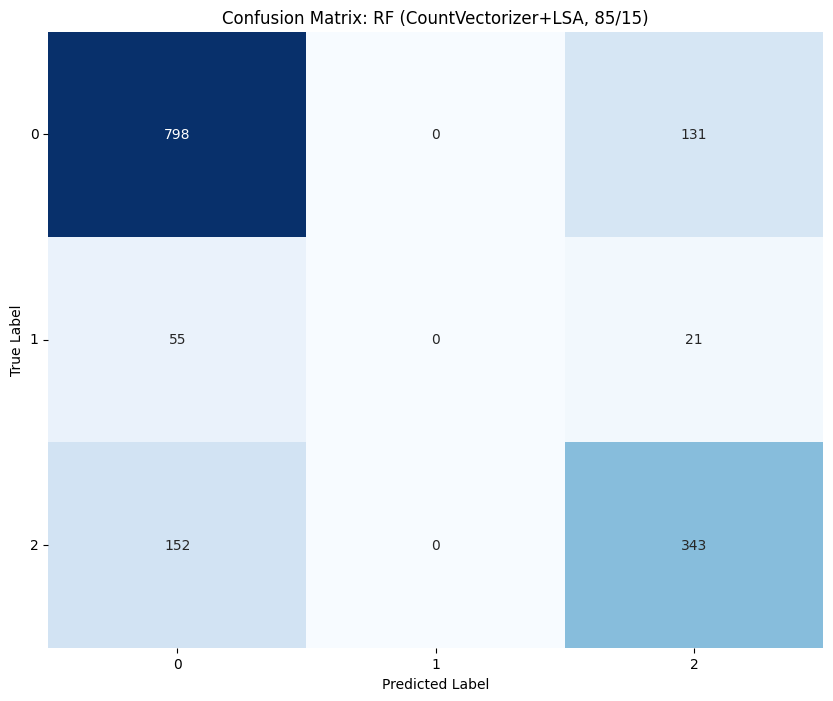

In [34]:
# Inisialisasi model
model_svm_lsa = SVC(probability=True)

# Latih model
model_svm_lsa.fit(X_train, y_train)

# Simpan model
dump(model_svm_lsa, filename='model_svm_lsa.joblib')

# Gunakan model yang telah di latih untuk memprediksi label pada data uji

model_pred_svm_lsa = model_svm_lsa.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred_svm_lsa

# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar_svm_lsa = (model_pred_svm_lsa == y_test).sum()
prediksi_salah_svm_lsa = (model_pred_svm_lsa != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar_svm_lsa)
print('Jumlah prediksi salah\t:', prediksi_salah_svm_lsa)

accuracy_svm_lsa = prediksi_benar_svm_lsa / (prediksi_benar_svm_lsa + prediksi_salah_svm_lsa)*100
print('Akurasi pengujian\t:', accuracy_svm_lsa, '%')

# Tampilkan confusion matrix dan classification report
print("Confusion matrix:\n", confusion_matrix(y_test, model_pred_svm_lsa))
print("\nClassification report:\n", classification_report(y_test, model_pred_svm_lsa))

cm = confusion_matrix(y_test, model_pred_svm_lsa)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: RF (CountVectorizer+LSA, 85/15)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation=0)
plt.show()

# 9. KOMPARASI MODEL

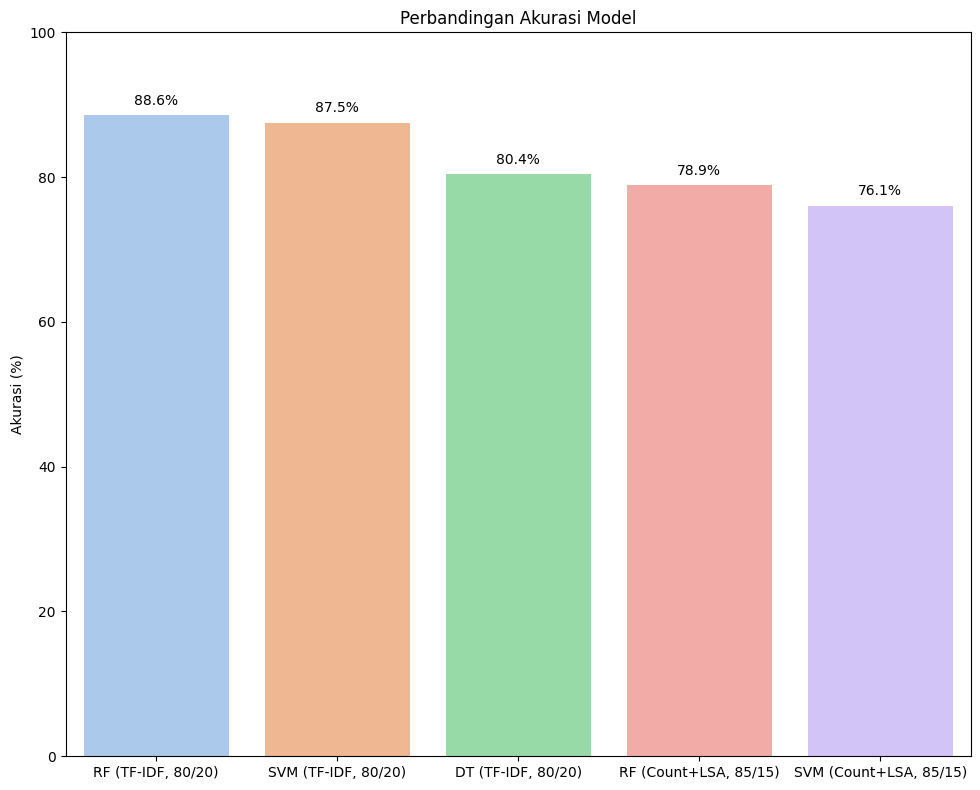

In [35]:
# Data model dan akurasi
models = [
    'RF (TF-IDF, 80/20)',
    'SVM (TF-IDF, 80/20)',
    'DT (TF-IDF, 80/20)',
    'RF (Count+LSA, 85/15)',
    'SVM (Count+LSA, 85/15)'
]
accuracies = [
    accuracy_rf,
    accuracy_svm,
    accuracy_dt,
    accuracy_rf_lsa,
    accuracy_svm_lsa
]

# Plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=models, y=accuracies, palette='pastel')

# Atur label sumbu dan batas
ax.set_ylim(0, 100)
ax.set_ylabel('Akurasi (%)')
ax.set_title('Perbandingan Akurasi Model')

# Tambahkan label persentase di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 1,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Ubah posisi label model agar ditengah (default-nya sudah center)
ax.set_xticklabels(models, ha='center', rotation=0)

plt.tight_layout()
plt.show()

# 10. INFERENCE

In [36]:
# === 1. Preprocessing function ===
def preprocess_text(text):
    text = re.sub(r'https\S+', ' ', text, flags=re.IGNORECASE) # Menghapus URL
    text = text.lower() # Mengubah teks jadi lower case
    text = re.sub(r'@\S+', ' ', text, flags=re.IGNORECASE) # Menghapus mention
    text = re.sub(r'#\S+', ' ', text, flags=re.IGNORECASE) # Menghapus hashtag
    text = re.sub(r"'\w+", ' ', text) # Menghapus next karakter
    text = re.sub(r'[^\w\s]', ' ', text) # Menghapus tanda baca
    text = re.sub(r'\s+', ' ', text).strip() # Menghapus extra whitespace
    return text

# === 2. Input teks manual ===
test_input = "gojek suka nyiksa driver, parah banget"
test_input_preprocessed = preprocess_text(test_input)
print(f"===INFERENCE===")
print(f"\nTeks setelah preprocessing: {test_input_preprocessed}")

# === 3. Prediksi dari lima model ===
results = {}

# --- TF-IDF Vectorizer ---
tfidf_vectorizer = load('tfidf_vectorizer.joblib')
X_tfidf = tfidf_vectorizer.transform([test_input_preprocessed])

# --- LSA Vectorizer (Count + SVD) ---
cv_lsa = load('lsa_count_vectorizer.joblib')
svd_lsa = load('lsa_svd_transformer.joblib')
X_counts_lsa = cv_lsa.transform([test_input_preprocessed])
X_lsa = svd_lsa.transform(X_counts_lsa)

# --- [A] Random Forest + TF-IDF ---
model_rf_tfidf = load('model_rf_tfidf.joblib')
pred_rf_tfidf = model_rf_tfidf.predict(X_tfidf)[0]
results['Random Forest (TF-IDF)'] = pred_rf_tfidf

# --- [B] Random Forest + LSA ---
model_rf_lsa = load('model_rf_lsa.joblib')
pred_rf_lsa = model_rf_lsa.predict(X_lsa)[0]
results['Random Forest (LSA)'] = pred_rf_lsa

# --- [C] SVM + TF-IDF ---
model_svm_tfidf = load('model_svm_tfidf.joblib')
pred_svm_tfidf = model_svm_tfidf.predict(X_tfidf)[0]
results['SVM (TF-IDF)'] = pred_svm_tfidf

# --- [D] SVM + LSA ---
model_svm_lsa = load('model_svm_lsa.joblib')
pred_svm_lsa = model_svm_lsa.predict(X_lsa)[0]
results['SVM (LSA)'] = pred_svm_lsa

# --- [E] Decision Tree + TF-IDF ---
model_dt_tfidf = load('model_dt_tfidf.joblib')
pred_dt_tfidf = model_dt_tfidf.predict(X_tfidf)[0]
results['Decision Tree (TF-IDF)'] = pred_dt_tfidf

# === 4. Mapping hasil prediksi ke label ===
label_mapping = {-1: 'Negatif', 0: 'Netral', 1: 'Positif'}

print("\n=== Hasil Prediksi dari Lima Model ===")
for model_name, pred in results.items():
    label = label_mapping.get(pred, "Tidak dikenali")
    print(f"{model_name}: {label}")

# === 5. Simpan hasil ke file ===
with open('hasil_prediksi_semua_model.txt', 'w') as f:
    f.write(f"Teks asli: {test_input}\n")
    f.write(f"Teks setelah preprocessing: {test_input_preprocessed}\n\n")
    f.write("Hasil Prediksi:\n")
    for model_name, pred in results.items():
        label = label_mapping.get(pred, "Tidak dikenali")
        f.write(f"{model_name}: {label}\n")

===INFERENCE===

Teks setelah preprocessing: gojek suka nyiksa driver parah banget

=== Hasil Prediksi dari Lima Model ===
Random Forest (TF-IDF): Negatif
Random Forest (LSA): Negatif
SVM (TF-IDF): Negatif
SVM (LSA): Negatif
Decision Tree (TF-IDF): Negatif


# 11. WordCloud

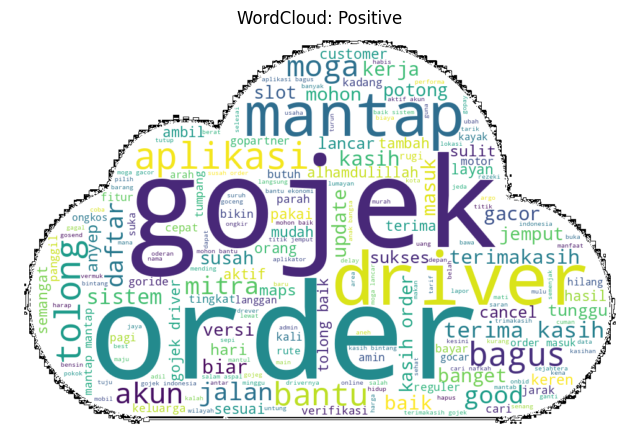

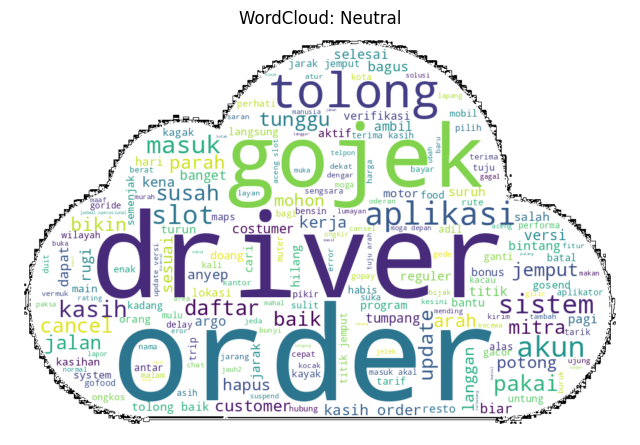

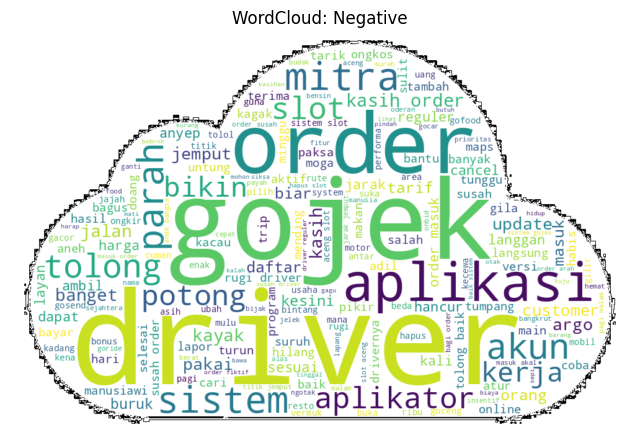

In [37]:
# Unduh gambar mask
!wget -q https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg -O cloud.jpg
mask_img = cv2.imread('cloud.jpg', cv2.IMREAD_GRAYSCALE)

for lab in ['positive', 'neutral', 'negative']:
    # Ambil teks, buang NaN, dan ubah semua jadi string
    texts = df[df['label'] == lab]['text_String'].dropna().astype(str)
    txt = ' '.join(texts)

    wc = WordCloud(mask=mask_img, background_color='white', contour_width=1, contour_color='black')

    plt.figure(figsize=(8, 6))
    plt.imshow(wc.generate(txt), interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud: {lab.title()}")
    plt.show()